# Design & Implement Neural network models (Perceprton,SVM,LVQ,SOM) on Behavior of Urban trafic of the city of Sao Paulo in Brazil


# PERCEPTRON

In [1]:
import numpy as np
import tensorflow as tf
# creating the input data to our neural network
# Are four elemtents of x1 and x2 columns
data_input_x = np.array([[0.0, 0.0], 
                         [0.0, 1.0],
                         [1.0, 0.0],
                         [1.0, 1.0]])
# creating the classification that we know to out input data ('classe' column)
data_y = np.array([[0.0], [0.0], [0.0], [1.0]])

def step_function(sum_value):
    return tf.cast(tf.to_float(tf.math.greater_equal(sum_value, 1)), tf.float64)

# Define the variables used during de processing
# Two weights to only one neuron
# Weights are initialized with zero
weights = tf.Variable(tf.zeros([2,1], dtype = tf.float64))

# define our outputlayer calculation
output_layer = tf.matmul(data_input_x, weights)

# define our activation function to transform the output layer values into knowed classes (0 or 1)
predictions = step_function(output_layer)

# define score function to evaluate the accuracy
error = tf.subtract(data_y, predictions)

# define delta function used to adjust the weights during the training
delta = tf.matmul(data_input_x, error, transpose_a = True)
learningRate = 0.1
train = tf.assign(weights, tf.add(weights, tf.multiply(delta, learningRate)))

# Create the initializer function TensorFlow Variables used during the processing
init = tf.global_variables_initializer()

with tf.Session() as s:
    s.run(init)
    print('Output layer result: \n', s.run(output_layer))
    print('Prediction result: \n', s.run(predictions))
    print('Error result: \n', s.run(error))
    print('\n')
    for epoch in range(15):
        train_error, _ = s.run([error, train])
        train_error_sum = tf.reduce_sum(train_error)
        print('Epoch: ', epoch+1, ' - Error: ', s.run(train_error_sum))
        if train_error_sum.eval() == 0.0:
            break; # learned and got 100% accuracy
    print('\nWeights to the best accuracy: \n', s.run(weights))

ModuleNotFoundError: No module named 'tensorflow'

In [12]:
import pandas as pd 
data = pd.read_csv("csv.csv") 
#data.head()
#data
df = pd.DataFrame(data)
#First
df1 = df[df.Caesarian=='Yes']
#Second
df2 = df[df.Caesarian=='No']
df.groupby('Caesarian').size()
df.describe()

,Age,Delivey No
count,80.000000,80.000000
mean,27.687500,1.662500
std,5.017927,0.794662
min,17.000000,1.000000
25%,25.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,2.000000
max,40.000000,4.000000


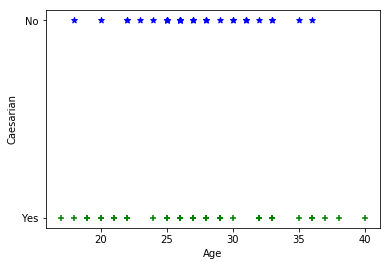

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Caesarian')
plt.scatter(df1['Age'],df1['Caesarian'],color = 'green', marker='+')
plt.scatter(df2['Age'],df2['Caesarian'],color = 'blue', marker='*')

In [18]:
from sklearn.model_selection import train_test_split
X = df.values
Y = df['Caesarian'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [80, 46]

In [ ]:
from sklearn.model_selection import train_test_split
X = df1
y = df1.Caesarian
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

# SVM

In [34]:
from sklearn import datasets
import numpy as np
import pandas as pd
df=pd.read_csv('csv.csv')
#print(df.head())
y=df.iloc[:,5].values
print(y)
X=df.iloc[:,2:6].values
#print(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=0.2,random_state=0)
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)
print('misclassified samples: %d'%(y_test!=y_pred).sum())#compute
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

['No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No']


ValueError: could not convert string to float: 'Yes'

# LVQ

In [21]:
import numpy as np
x = np.array([[ 1, 1, 0, 0],[0, 0, 0, 1],[1, 0, 0, 0],[0, 0, 1, 1]])
w = np.array([[0.2 ,0.8], [0.6, 0.4], [0.5, 0.7], [0.9, 0.3]])
t=np.array([0,0,1,1])
lrate= 0.6
e=1
D=[0,0]
print('learning rate of this epoch is',lrate);
while(e<=3):
    print('Epoch is',e);
    for i in range(4):
        for j in range(2):
            temp=0
            for k in range(4):
                temp = temp + ((w[k,j]-x[i,k])**2)
                D[j]=temp
        if(D[0]<D[1]):
            J=0
        else:
            J=1
        print('winning unit is',J+1)
        print('weight updation ...')
        if J==t[i]:
            for m in range(4):
                w[m,J]=w[m,J] + (lrate *(x[i,m]-w[m,J]))
        else:
            for m in range(4):
                w[m,J]=w[m,J] - (lrate *(x[i,m]-w[m,J]))
        print('Updated weights',w)
    e=e+1
    lrate = 0.5*lrate;
    print(' updated learning rate after ',e,' epoch is',lrate)

learning rate of this epoch is 0.6
Epoch is 1
winning unit is 2
weight updation ...
Updated weights [[0.2  0.68]
 [0.6  0.04]
 [0.5  1.12]
 [0.9  0.48]]
winning unit is 1
weight updation ...
Updated weights [[0.08 0.68]
 [0.24 0.04]
 [0.2  1.12]
 [0.96 0.48]]
winning unit is 2
weight updation ...
Updated weights [[0.08  0.872]
 [0.24  0.016]
 [0.2   0.448]
 [0.96  0.192]]
winning unit is 1
weight updation ...
Updated weights [[ 0.128  0.872]
 [ 0.384  0.016]
 [-0.28   0.448]
 [ 0.936  0.192]]
 updated learning rate after  2  epoch is 0.3
Epoch is 2
winning unit is 2
weight updation ...
Updated weights [[ 0.128   0.8336]
 [ 0.384  -0.2792]
 [-0.28    0.5824]
 [ 0.936   0.2496]]
winning unit is 1
weight updation ...
Updated weights [[ 0.0896  0.8336]
 [ 0.2688 -0.2792]
 [-0.196   0.5824]
 [ 0.9552  0.2496]]
winning unit is 2
weight updation ...
Updated weights [[ 0.0896   0.88352]
 [ 0.2688  -0.19544]
 [-0.196    0.40768]
 [ 0.9552   0.17472]]
winning unit is 1
weight updation ...
Update

# SOM

In [1]:
import numpy as np
x = np.array([[ 1, 1, 0, 0],[0, 0, 0, 1],[1, 0, 0, 0],[0, 0, 1, 1]])
w =np.array([[0.2 ,0.8], [0.6, 0.4], [0.5, 0.7], [0.9, 0.3]])
lrate= 0.6
e=1
D=[0,0]
print('learning rate of this epoch is',lrate);
while(e<=3): # e is epoch
    print('Epoch is',e);
    
    for i in range(4): # number of patterns 4
        for j in range(2): # size of neurons 
             temp=0
             for k in range(4):
                temp = temp + ((w[k,j]-x[i,k])**2)
             D[j]=temp # distance matrix
        #decide winner neurons
        if(D[0]<D[1]):
            J=0
        else:
            
            J=1
        
        print('winning unit is',J+1)
        print('weight updation ...')
        for m in range(4):
             w[m,J]=w[m,J] + (lrate *(x[i,m]-w[m,J]))
        print('Updated weights',w)
        

    e=e+1
    lrate = 0.5*lrate;
    print(' updated learning rate after ',e,' epoch is',lrate)




learning rate of this epoch is 0.6
Epoch is 1
winning unit is 2
weight updation ...
Updated weights [[0.2  0.92]
 [0.6  0.76]
 [0.5  0.28]
 [0.9  0.12]]
winning unit is 1
weight updation ...
Updated weights [[0.08 0.92]
 [0.24 0.76]
 [0.2  0.28]
 [0.96 0.12]]
winning unit is 2
weight updation ...
Updated weights [[0.08  0.968]
 [0.24  0.304]
 [0.2   0.112]
 [0.96  0.048]]
winning unit is 1
weight updation ...
Updated weights [[0.032 0.968]
 [0.096 0.304]
 [0.68  0.112]
 [0.984 0.048]]
 updated learning rate after  2  epoch is 0.3
Epoch is 2
winning unit is 2
weight updation ...
Updated weights [[0.032  0.9776]
 [0.096  0.5128]
 [0.68   0.0784]
 [0.984  0.0336]]
winning unit is 1
weight updation ...
Updated weights [[0.0224 0.9776]
 [0.0672 0.5128]
 [0.476  0.0784]
 [0.9888 0.0336]]
winning unit is 2
weight updation ...
Updated weights [[0.0224  0.98432]
 [0.0672  0.35896]
 [0.476   0.05488]
 [0.9888  0.02352]]
winning unit is 1
weight updation ...
Updated weights [[0.01568 0.98432]
 [0